<a href="https://colab.research.google.com/github/katetarasenko/Practical_5/blob/main/Pract5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Для датасету px.data.iris() побудувати наступні графіки.  

1.Побудуйте 3D-графік розподілу даних для датасету Iris з використанням властивостей "sepal_length," "sepal_width," та "petal_length." Кожна точка має бути розфарбована відповідно до класу квітки (setosa, versicolor, virginica).

In [ ]:
import plotly.express as px


In [ ]:
df = px.data.iris()

In [ ]:
fig = px.scatter_3d(df,
                    x='sepal_length',
                    y='sepal_width',
                    z='petal_width',
                    color='species')
fig.show()

2.Побудуйте горизонтальний гістограму для розподілу значень "petal_width" для різних видів квіток в датасеті Iris.

In [ ]:
import seaborn as sns

iris = sns.load_dataset("iris")

fig = px.histogram(iris, y="petal_width", title="Distribution of Petal Width",
                   labels={"petal_width": "Petal Width"})

fig.show()

3.Побудуйте лінійний графік, що відображає зміну середнього значення "sepal_length" в залежності від значення "sepal_width" для кожного виду квітки (setosa, versicolor, virginica).

In [ ]:
mean_values = iris.groupby(['species', 'sepal_width']).mean().reset_index()

fig = px.line(mean_values, x='sepal_width', y='sepal_length', color='species',
              labels={'sepal_width': 'Sepal Width', 'sepal_length': 'Mean Sepal Length'},
              title="Change of Mean Sepal Length vs Sepal Width for Each Species")

fig.show()

2. Для датасету  px.data.gapminder() побудувати наступні графіки

1.Побудувати гістограму, яка відображає розподіл ВВП за країнами для року 2007. Обрати 10 країн з найбільшим ВВП та позначити їх на гістограмі з неперервною зміною кольору. Додати підписи над стовпцями та вирівняти їх горизонтально. Назва графіку має бути розташована за центром.

In [ ]:
df = px.data.gapminder()
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [ ]:
import pandas as pd
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
iso_alpha     object
iso_num        int64
dtype: object

In [ ]:
data_2007 = df[df['year'] == 2007]
data_2007

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


In [ ]:
top_10_countries = data_2007.nlargest(10, 'gdpPercap')
print(top_10_countries)

               country continent  year  lifeExp        pop    gdpPercap  \
1151            Norway    Europe  2007   80.196    4627926  49357.19017   
863             Kuwait      Asia  2007   77.588    2505559  47306.98978   
1367         Singapore      Asia  2007   79.972    4553009  47143.17964   
1619     United States  Americas  2007   78.242  301139947  42951.65309   
755            Ireland    Europe  2007   78.885    4109086  40675.99635   
671   Hong Kong, China      Asia  2007   82.208    6980412  39724.97867   
1487       Switzerland    Europe  2007   81.701    7554661  37506.41907   
1091       Netherlands    Europe  2007   79.762   16570613  36797.93332   
251             Canada  Americas  2007   80.653   33390141  36319.23501   
695            Iceland    Europe  2007   81.757     301931  36180.78919   

     iso_alpha  iso_num  
1151       NOR      578  
863        KWT      414  
1367       SGP      702  
1619       USA      840  
755        IRL      372  
671        HKG    

In [ ]:
fig = px.bar(top_10_countries, x='country', y='gdpPercap',
             title='GDP by country for 2007 year',
             labels={'country': 'Country', 'gdpPercap': 'Per capita GDP:'},
             color='gdpPercap',
             color_continuous_scale='Viridis',
             text='gdpPercap',
             template='plotly_white'
            )
fig.update_layout(title_x=0.5)
fig.show()

2. Побудувати кругову діаграму, яка відображає розподіл ВВП за країнами Європи у 2018 році. Виберіть 5 країн з найбільшим ВВП і підпишіть діаграму за центром, щоб вона була зручною для сприйняття.

In [ ]:
data_1972 = df[df['year'] == 1972]
data_1972

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
16,Albania,Europe,1972,67.690,2263554,3313.422188,ALB,8
28,Algeria,Africa,1972,54.518,14760787,4182.663766,DZA,12
40,Angola,Africa,1972,37.928,5894858,5473.288005,AGO,24
52,Argentina,Americas,1972,67.065,24779799,9443.038526,ARG,32
...,...,...,...,...,...,...,...,...
1648,Vietnam,Asia,1972,50.254,44655014,699.501644,VNM,704
1660,West Bank and Gaza,Asia,1972,56.532,1089572,3133.409277,PSE,275
1672,"Yemen, Rep.",Asia,1972,39.848,7407075,1265.047031,YEM,887
1684,Zambia,Africa,1972,50.107,4506497,1773.498265,ZMB,894


In [ ]:
top_5_countries = data_1972.nlargest(5, 'gdpPercap')
top_5_countries

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
856,Kuwait,Asia,1972,67.712,841934,109347.86700,KWT,414
1480,Switzerland,Europe,1972,73.780,6401400,27195.11304,CHE,756
1312,Saudi Arabia,Asia,1972,53.886,6472756,24837.42865,SAU,682
1612,United States,Americas,1972,71.340,209896000,21806.03594,USA,840
904,Libya,Africa,1972,52.773,2183877,21011.49721,LBY,434


In [ ]:
fig = px.pie(top_5_countries,
             values='gdpPercap',
             names='country',
             title='GDP by country for 1972 year',
             hole=0.5)

fig.update_layout(title_x=0.5)
fig.show()

3. Побудувати  стовпчасту діаграму, яка відображає динаміку зміни кількості населення для Канади в країнах Океанії протягом років.

In [ ]:
data_canada_oceania = df[(df['country'].isin(['Canada', 'Australia']))]
data_canada_oceania

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
60,Australia,Oceania,1952,69.120,8691212,10039.59564,AUS,36
61,Australia,Oceania,1957,70.330,9712569,10949.64959,AUS,36
62,Australia,Oceania,1962,70.930,10794968,12217.22686,AUS,36
63,Australia,Oceania,1967,71.100,11872264,14526.12465,AUS,36
64,Australia,Oceania,1972,71.930,13177000,16788.62948,AUS,36
65,Australia,Oceania,1977,73.490,14074100,18334.19751,AUS,36
66,Australia,Oceania,1982,74.740,15184200,19477.00928,AUS,36
67,Australia,Oceania,1987,76.320,16257249,21888.88903,AUS,36
68,Australia,Oceania,1992,77.560,17481977,23424.76683,AUS,36
69,Australia,Oceania,1997,78.830,18565243,26997.93657,AUS,36


In [ ]:
fig = px.bar(data_canada_oceania,
             x='year',
             y='pop',
             title='Population Dynamics of Canada in Oceania Countries over Years',
             labels={'year': 'Year', 'pop': 'Population'},
             color = 'country'
            )
fig.update_layout(title_x=0.5)
fig.show()

3. Побудувати лінійні графіки для тригонометричних функцій. Назву графіку вирівняти за центром

1. На проміжку
[0;5π]
0;5𝜋

 функція
2cosx−𝜋/4



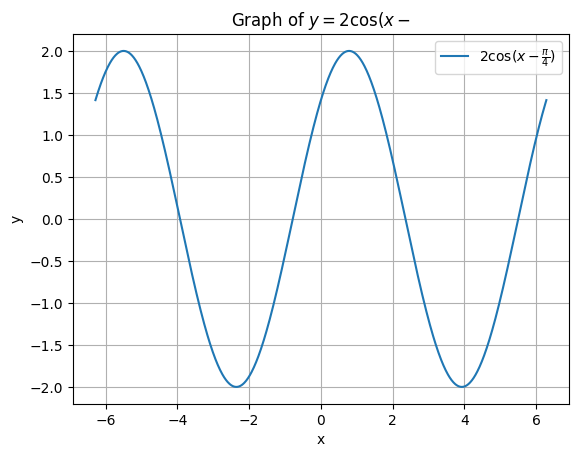

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.linspace(-2*np.pi, 2*np.pi, 1000)
y_values = 2 * np.cos(x_values - np.pi/4)

plt.plot(x_values, y_values, label=r'$2\cos(x-\frac{\pi}{4})$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of $y = 2\cos(x-\frac{\pi}{4})$')
plt.legend()

plt.grid(True)
plt.show()

На проміжку
[0;2π]


 функція
y=12sin(2x+π3)




In [ ]:
x = np.linspace(0, 2 * np.pi, 1000)
y = 12 * np.sin(2 * x + np.pi/3)

fig = px.line(x=x,
              y=y,
              labels={'x':'x', 'y':'12sin(2x+π/3)'},
              title='Графік функції')
fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y = 2 * np.tan(12 * x + np.pi / 1)

fig = px.line(x=x,
              y=y,
              labels={'x': 'x', 'y': '2tan(12x+π/y)'},
              title='Графік функції')

fig.update_layout(title_x=0.5)
fig.show()